In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import json
import tweepy as tw
import nltk
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
import igraph
import warnings
import community as community_louvain
warnings.filterwarnings("ignore")

# Data Processing

In [2]:
network_data2 = pd.read_csv("./dataset/network_data3.csv")
network_data2

,author_id,id,lang,referenced_tweets_id,referenced_tweets_type,text,created_at,public_metrics,ifmis,Source_author_id
0,1275531383021146112,1357411152720928768,en,1357351156826083328,retweeted,RT @narendramodi: Spoke to President @CyrilRam...,2021-02-04T19:30:12.000Z,"{'retweet_count': 4056, 'reply_count': 0, 'lik...",0,18839785
1,344269254,1357411152368648193,es,1357410121274523649,retweeted,RT @532_gnb: #GNBJuntoAlPueblo no da tregua en...,2021-02-04T19:30:12.000Z,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",0,1165693742638084096
2,4825557477,1357411152289009667,en,1357312524404875267,retweeted,RT @TorontoStar: How risky are Ontario schools...,2021-02-04T19:30:12.000Z,"{'retweet_count': 43, 'reply_count': 0, 'like_...",0,12848262
3,2866489102,1357411152167337990,en,1357395305625341953,retweeted,RT @dankennedy_nu: Now up at @storybench: How ...,2021-02-04T19:30:12.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",0,15675013
4,1211482698708946944,1357411151684993029,en,1357116036647182337,quoted,This is considered a felony with Covid going o...,2021-02-04T19:30:12.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,24736864
...,...,...,...,...,...,...,...,...,...,...
144658,1259818735130611713,1357388838222585864,en,1357388745151025152,retweeted,RT @NewtonClarkeUK: Funny what can be achieved...,2021-02-04T18:01:32.000Z,"{'retweet_count': 8, 'reply_count': 0, 'like_c...",0,1199753098824159233
144659,2664767872,1357388838012919813,es,1357257747889348610,retweeted,RT @PabloFuente: #COVID19 Cribado masivo en Co...,2021-02-04T18:01:32.000Z,"{'retweet_count': 580, 'reply_count': 0, 'like...",0,62814101
144660,16898091,1357388837698289664,en,1357358075498418181,retweeted,RT @TheBarbarienne: If the flu got this big a ...,2021-02-04T18:01:32.000Z,"{'retweet_count': 104, 'reply_count': 0, 'like...",0,239930106
144661,467248605,1357388837551411211,en,1357340566187429894,retweeted,RT @ShishirGoUP: UP under CM @myogiadityanath ...,2021-02-04T18:01:32.000Z,"{'retweet_count': 275, 'reply_count': 0, 'like...",0,1085192208955756548


In [3]:
network_data1 = pd.read_csv("./dataset/network_data1.csv")
network_data1

,author_id,id,lang,referenced_tweets_id,referenced_tweets_type,text,created_at,public_metrics,ifmis,Source_author_id
0,126237449,1366668782677069831,en,1366377045694029828,retweeted,"RT @lsferguson: Hydroxychloroquine is a safe, ...",2021-03-02T08:36:43.000Z,"{'retweet_count': 1285, 'reply_count': 0, 'lik...",1,2.165198e+07
1,1245452098935730176,1366668731124838401,en,1366109545727098880,replied_to,"@GovInslee Anything helps thank you, @GovInsle...",2021-03-02T08:36:31.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1,1.077215e+09
2,1075763979778187264,1366668198364479488,en,1366514380557402120,replied_to,@PaulWaddington3 @ClarkeMicah I couldnt give a...,2021-03-02T08:34:24.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1,6.330164e+08
3,270416438,1366667937298472960,en,1366657340234231812,replied_to,@MayorofLondon @BBCNews FUCK YOUR PLANdemic. W...,2021-03-02T08:33:22.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1,1.470012e+07
4,1252904921416032256,1366667935390060544,en,1366507984239566856,retweeted,RT @VerumBellator1: PlanDemic 🔺️👁 https://t.co...,2021-03-02T08:33:21.000Z,"{'retweet_count': 32, 'reply_count': 0, 'like_...",1,9.177727e+17
...,...,...,...,...,...,...,...,...,...,...
165559,865585619233263616,1355667889039179782,en,1355667155123986433,replied_to,@Redhdlois I certainly won’t be lining up for ...,2021-01-31T00:03:06.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1,NaN
165560,1043185714437992449,1355652748000288777,en,1355650350297001986,quoted,You caused the crisis. https://t.co/QbmqIfhkYT,2021-01-30T23:02:56.000Z,"{'retweet_count': 667, 'reply_count': 134, 'li...",1,1.749401e+07
165561,68825587,1355667692917813254,en,1355667366449827840,replied_to,@WomenInTheBurbs That is soooo sad.What busine...,2021-01-31T00:02:19.000Z,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1,NaN
165562,3349241,1355667443784495107,en,1355662729151827972,quoted,Trump supporters are now shutting down vaccina...,2021-01-31T00:01:20.000Z,"{'retweet_count': 38, 'reply_count': 5, 'like_...",1,1.709431e+07


In [4]:
network_data1.dropna(subset=['Source_author_id'],inplace=True)
network_data2.dropna(subset=['Source_author_id'],inplace=True)
print(len(network_data1),len(network_data2))

152137 144663


In [5]:
network_data1['Source_author_id'] = pd.to_numeric(network_data1['Source_author_id']).round(0).astype(int) 

In [6]:
network_mis= network_data1[['author_id', 'Source_author_id']]
network_mis['weight']=0
network_mis=network_mis.groupby(['author_id', 'Source_author_id'], as_index=False).count()
network_mis['ifmis']=1

network_mis


,author_id,Source_author_id,weight,ifmis
0,2692,1163618839,1,1
1,2692,4098100355,1,1
2,12590,1964734532,1,1
3,12917,15812284,1,1
4,29283,102594136,1,1
...,...,...,...,...
130770,1366258591406059520,1366256222765150208,1,1
130771,1366261165668540425,1366256222765150208,1,1
130772,1366396931740741634,1307398223695417344,2,1
130773,1366400345312739334,1307398223695417344,2,1


In [7]:
network_nonmis= network_data2[['author_id', 'Source_author_id']]
network_nonmis['weight']=0
network_nonmis=network_nonmis.groupby(['author_id', 'Source_author_id'], as_index=False).count()
network_nonmis['ifmis']=0
network_nonmis

,author_id,Source_author_id,weight,ifmis
0,187,2927379996,1,0
1,3206,2927379996,1,0
2,3363,58951368,1,0
3,3832,3832,2,0
4,3832,19604599,1,0
...,...,...,...,...
133136,1357405807994753024,1257348234676260866,1,0
133137,1357406696390418434,61660254,1,0
133138,1357408407586820097,79293791,1,0
133139,1357408718082748416,2198363538,1,0


In [8]:
network_data=pd.concat([network_mis, network_nonmis], ignore_index=True)

In [9]:
# id1=network_nonmis.author_id.unique().tolist()
# id2=network_nonmis.Source_author_id.unique().tolist()
# id3=id1+id2
# id4 = list(set(id3)) 
# dic_id = {id4[i]:i for i in range(len(id4))}

# def apply_id(x):
    
#     index=dic_id[x]
#     return index

# network_nonmis["author_id"] = network_nonmis["author_id"].apply(apply_id)
# network_nonmis["Source_author_id"] = network_nonmis["Source_author_id"].apply(apply_id)
# network_nonmis.sort_values("author_id",inplace=True)
# network_nonmis

# Network Creating

In [10]:
G_mis = nx.from_pandas_edgelist(network_mis, 'author_id', 'Source_author_id', ["weight","ifmis"], create_using = nx.DiGraph())
G_nonmis = nx.from_pandas_edgelist(network_nonmis, 'author_id', 'Source_author_id', ["weight","ifmis"], create_using = nx.DiGraph())

In [11]:
Gmis_componrnts=nx.strongly_connected_components(G_mis)
largest_components=max(Gmis_componrnts,key=len)
subgraph_nodes=list(largest_components)
Gmis_subgraph=G_mis.subgraph(subgraph_nodes)
H_mis=Gmis_subgraph.to_undirected()
print("Number of g nodes:",H_mis.number_of_nodes())
print("Number of g edges:",H_mis.size())

Number of g nodes: 495
Number of g edges: 1150


In [97]:
Gnmis_componrnts=nx.strongly_connected_components(G_nonmis)
largest_components=max(Gnmis_componrnts,key=len)
subgraph_nodes=list(largest_components)
Gnmis_subgraph=G_nonmis.subgraph(subgraph_nodes)
H_nmis=Gnmis_subgraph.to_undirected()
print("Number of g nodes:",H_nmis.number_of_nodes())
print("Number of g edges:",H_nmis.size())

Number of g nodes: 10
Number of g edges: 17


In [98]:
Gnonmis_componrnts=nx.strongly_connected_components(G_nonmis)
list_components=list(Gnonmis_componrnts)
list_components.sort(key= len,reverse=True)
subgraph_nodes2=[]
for com in list_components:
    if len(com)>2:
        subgraph_nodes2+=com
    else:
        continue
        
Gnonmis_subgraph=G_nonmis.subgraph(subgraph_nodes2)
H_nonmis=Gnonmis_subgraph.to_undirected()
print("Number of g nodes:",H_nonmis.number_of_nodes())
print("Number of g edges:",H_nonmis.size())

Number of g nodes: 279
Number of g edges: 273


In [13]:
dfsmall_mis = nx.to_pandas_edgelist(H_mis)
dfsmall_mis

,source,target,ifmis,weight
0,852983071863316480,19242147,1,1
1,819490240327020544,19242147,1,1
2,706863698976051200,19242147,1,1
3,763376117428301824,314935651,1,1
4,1056205752350715904,314935651,1,1
...,...,...,...,...
1145,215863127,494772133,1,1
1146,2906838886,2906838886,1,2
1147,755773333346643968,755773333346643968,1,2
1148,241727406,2724227049,1,1


In [14]:
dfsmall_nonmis = nx.to_pandas_edgelist(H_nonmis)
dfsmall_nonmis

,source,target,ifmis,weight
0,813593771644358656,1705256178,0,3
1,1288790240992178176,258186781,0,2
2,1288790240992178176,1254576560083922945,0,1
3,1288790240992178176,2867439589,0,1
4,1254576560083922945,258186781,0,1
...,...,...,...,...
268,20720089,20720089,0,1
269,20720089,106228712,0,1
270,21968354,21968354,0,1
271,106228712,106228712,0,1


In [15]:
data_small = pd.concat([dfsmall_nonmis, dfsmall_mis], ignore_index=True)
data_small

,source,target,ifmis,weight
0,813593771644358656,1705256178,0,3
1,1288790240992178176,258186781,0,2
2,1288790240992178176,1254576560083922945,0,1
3,1288790240992178176,2867439589,0,1
4,1254576560083922945,258186781,0,1
...,...,...,...,...
1418,215863127,494772133,1,1
1419,2906838886,2906838886,1,2
1420,755773333346643968,755773333346643968,1,2
1421,241727406,2724227049,1,1


In [16]:
def apply_id(x):
    index=dic_id[x]
    return index
id1=data_small.source.unique().tolist()
id2=data_small.target.unique().tolist()
id3=id1+id2
id4 = list(set(id3)) 
dic_id = {id4[i]:i for i in range(len(id4))}
data_small["source"] = data_small["source"] .apply(apply_id)
data_small["target"]  = data_small["target"].apply(apply_id)
data_small.sort_values("source",inplace=True)
data_small['ifmis'].value_counts()

1    1150
0     273
Name: ifmis, dtype: int64

In [17]:
df_node1 = data_small.groupby(['source'])['ifmis'].max()
df_node2 = data_small.groupby(['target'])['ifmis'].max()
df_node1 = pd.DataFrame(df_node1)
df_node1 = df_node1.reset_index()
new_col = ['node', 'lable']
df_node1.columns = new_col
df_node2 = pd.DataFrame(df_node2)
df_node2 = df_node2.reset_index()
df_node2.columns = new_col
df_node = pd.merge(df_node1,df_node2,on='node',how='outer') 
df_node['lable_x'].fillna(0, inplace=True)
df_node['lable_y'].fillna(0, inplace=True)
df_node['lable']=df_node['lable_x']+df_node['lable_y']
df_node = df_node[['node','lable']]
df_node.sort_values("node",inplace=True)
df_node

,node,lable
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
767,766,0.0
768,767,1.0
769,768,1.0
770,769,1.0


In [18]:
def setlable(x):
    if x>=1:
        return 1
    else:
        return 0

df_node["lable1"] = df_node["lable"] .apply(setlable)
df_node

,node,lable,lable1,lable2
0,0,0.0,0,0
1,1,0.0,0,0
2,2,0.0,0,0
3,3,0.0,0,0
4,4,0.0,0,0
...,...,...,...,...
767,766,0.0,0,0
768,767,1.0,1,1
769,768,1.0,1,1
770,769,1.0,1,1


In [99]:
df_node.lable.value_counts()

0.0    276
1.0    261
2.0    234
Name: lable, dtype: int64

In [19]:
df_node.lable1.value_counts()

1    495
0    276
Name: lable1, dtype: int64

In [40]:
node=df_node.node.tolist()
node_lable=df_node.lable1.tolist()
dic_node = {node[i]:node_lable[i] for i in range(len(node))}


In [21]:
g = nx.from_pandas_edgelist(data_small, 'source', 'target', ['weight','ifmis'])

In [22]:
print("Number of g nodes:",g.number_of_nodes())
print("Number of g edges:",g.size())

Number of g nodes: 771
Number of g edges: 1423


In [23]:
nx.set_node_attributes(g, dic_node, "ismis")

In [44]:
def drawgraph(g,menberships):# draw the graph
    pos = nx.spring_layout(g)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(menberships.values()) + 1)
    nx.draw_networkx_nodes(g, pos, menberships.keys(), node_size=10,
                           cmap=cmap, node_color=list(menberships.values()),
                          with_labels=False)
    nx.draw_networkx_edges(g, pos, alpha=0.5)
    plt.show()


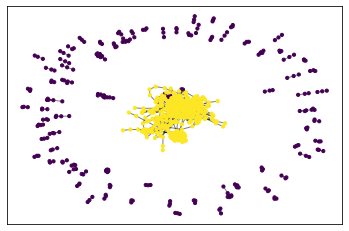

In [25]:
drawgraph(g,dic_node)

# Community Detection

# Non-overlapping 
## Louvain

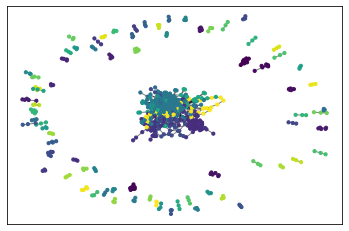

Cluster number of g: 88


In [26]:
partition1 = community_louvain.best_partition(g)
df1=pd.DataFrame.from_dict(list(partition1.items()))
new_col = ['node', 'Louvain_lable']
df1.columns = new_col
df1.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df1,on='node',how='outer')
drawgraph(g,partition1)
print("Cluster number of g:",1+max(partition1.values()))

## GEMSEC

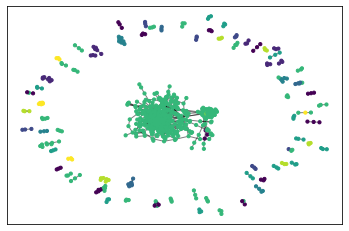

Cluster number of g: 10


In [27]:
from karateclub import GEMSEC
GEMSEC_g = GEMSEC()
GEMSEC_g.fit(g)
partition2 = GEMSEC_g.get_memberships()
drawgraph(g,partition2)
print("Cluster number of g:",1+max(partition2.values()))

In [29]:
df2=pd.DataFrame.from_dict(list(partition2.items()))
new_col = ['node', 'GEMSEC_lable']
df2.columns = new_col
df2.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df2,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable
0,0,0.0,0,0,0,4
1,1,0.0,0,0,0,4
2,2,0.0,0,0,1,3
3,3,0.0,0,0,0,4
4,4,0.0,0,0,0,4
...,...,...,...,...,...,...
766,766,0.0,0,0,0,4
767,767,1.0,1,1,35,6
768,768,1.0,1,1,20,6
769,769,1.0,1,1,86,6


## EdMot

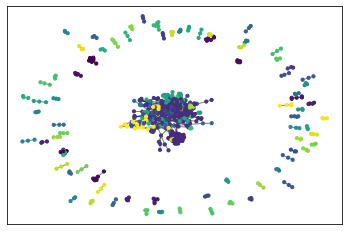

Cluster number of g: 94


In [30]:
from karateclub import EdMot
EdMot_g = EdMot()
EdMot_g.fit(g)
partition3 = EdMot_g.get_memberships()
drawgraph(g,partition3)
print("Cluster number of g:",1+max(partition3.values()))

In [31]:
df3=pd.DataFrame.from_dict(list(partition3.items()))
new_col = ['node', 'EdMot_lable']
df3.columns = new_col
df3.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df3,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable
0,0,0.0,0,0,0,4,0
1,1,0.0,0,0,0,4,0
2,2,0.0,0,0,1,3,1
3,3,0.0,0,0,0,4,0
4,4,0.0,0,0,0,4,0
...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0
767,767,1.0,1,1,35,6,12
768,768,1.0,1,1,20,6,25
769,769,1.0,1,1,86,6,93


## SCD 

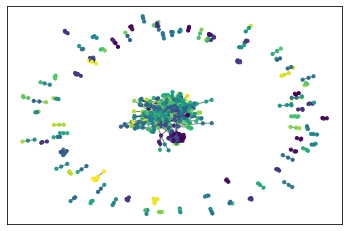

Cluster number of g: 439


In [32]:
from karateclub import SCD
SCD_g = SCD()
SCD_g.fit(g)
partition4= SCD_g.get_memberships()
drawgraph(g,partition4)
print("Cluster number of g:",1+max(partition4.values()))

In [33]:
df4=pd.DataFrame.from_dict(list(partition4.items()))
new_col = ['node', 'SCD_lable']
df4.columns = new_col
df4.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df4,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable
0,0,0.0,0,0,0,4,0,121
1,1,0.0,0,0,0,4,0,77
2,2,0.0,0,0,1,3,1,101
3,3,0.0,0,0,0,4,0,77
4,4,0.0,0,0,0,4,0,438
...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77
767,767,1.0,1,1,35,6,12,228
768,768,1.0,1,1,20,6,25,174
769,769,1.0,1,1,86,6,93,149


## LabelPropagation

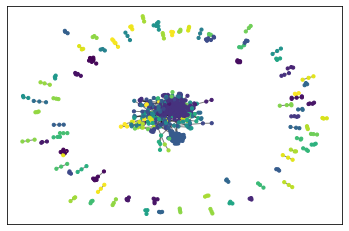

Cluster number of g: 771


In [90]:
from karateclub import LabelPropagation
LabelPropagation_g = LabelPropagation()
LabelPropagation_g.fit(g)
partition5 = LabelPropagation_g.get_memberships()

drawgraph(g,partition5)
print("Cluster number of g:",1+max(partition5.values()))

In [35]:
df5=pd.DataFrame.from_dict(list(partition5.items()))
new_col = ['node', 'LabelPropagation_lable']
df5.columns = new_col
df5.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df5,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable
0,0,0.0,0,0,0,4,0,121,2
1,1,0.0,0,0,0,4,0,77,2
2,2,0.0,0,0,1,3,1,101,13
3,3,0.0,0,0,0,4,0,77,2
4,4,0.0,0,0,0,4,0,438,15
...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2
767,767,1.0,1,1,35,6,12,228,610
768,768,1.0,1,1,20,6,25,174,715
769,769,1.0,1,1,86,6,93,149,751


# Overlapping

## EgoNetSplitter

In [58]:
from karateclub import EgoNetSplitter
EgoNetSplitter_g = EgoNetSplitter()
EgoNetSplitter_g.fit(g)
partition6 = EgoNetSplitter_g.get_memberships()
partition6

{0: [0],
 485: [0],
 1: [0],
 598: [0],
 3: [0],
 766: [0],
 2: [1],
 747: [1],
 412: [1],
 261: [1],
 696: [1],
 705: [1],
 563: [1],
 428: [1],
 314: [0],
 4: [0],
 34: [0],
 5: [2],
 6: [2],
 507: [2],
 125: [2],
 25: [2],
 693: [2],
 503: [2],
 7: [3],
 9: [3],
 8: [3],
 107: [3],
 75: [3],
 601: [3],
 450: [3],
 10: [0],
 11: [4],
 468: [4],
 12: [5],
 409: [5],
 157: [5],
 196: [5],
 410: [5],
 13: [6],
 332: [6],
 14: [7],
 179: [7],
 519: [7],
 703: [7],
 631: [7],
 15: [8],
 337: [8],
 536: [8],
 16: [9],
 445: [9],
 634: [9],
 178: [9],
 17: [10],
 438: [10],
 130: [10],
 18: [11],
 599: [11],
 480: [11],
 19: [17],
 269: [17],
 716: [17],
 20: [12],
 322: [17],
 688: [12],
 21: [23],
 454: [23],
 74: [24],
 239: [18],
 745: [17],
 280: [23],
 340: [23],
 614: [17],
 422: [23],
 22: [17],
 767: [17],
 403: [17],
 23: [30],
 717: [30],
 24: [17],
 165: [17],
 204: [17],
 52: [17],
 763: [17],
 386: [24],
 615: [23],
 26: [33],
 315: [33],
 495: [33],
 27: [17],
 423: [17],
 38

In [67]:
num_cluster =[]
for i in partition6.values():
    num_cluster.append(len(i))
max_num_cluster=max(num_cluster)
res=max([max(i) for i in partition6.values()])
print("The maximum number of overlapping communities is :",max_num_cluster)
print("Cluster number of g is :",res)

The maximum number of overlapping communities is : 1
Cluster number of g is : 92


In [87]:
partition6_1={}
for key,value in partition6.items():
       partition6_1.update({key: value[0]})
partition6_1

{0: 0,
 485: 0,
 1: 0,
 598: 0,
 3: 0,
 766: 0,
 2: 1,
 747: 1,
 412: 1,
 261: 1,
 696: 1,
 705: 1,
 563: 1,
 428: 1,
 314: 0,
 4: 0,
 34: 0,
 5: 2,
 6: 2,
 507: 2,
 125: 2,
 25: 2,
 693: 2,
 503: 2,
 7: 3,
 9: 3,
 8: 3,
 107: 3,
 75: 3,
 601: 3,
 450: 3,
 10: 0,
 11: 4,
 468: 4,
 12: 5,
 409: 5,
 157: 5,
 196: 5,
 410: 5,
 13: 6,
 332: 6,
 14: 7,
 179: 7,
 519: 7,
 703: 7,
 631: 7,
 15: 8,
 337: 8,
 536: 8,
 16: 9,
 445: 9,
 634: 9,
 178: 9,
 17: 10,
 438: 10,
 130: 10,
 18: 11,
 599: 11,
 480: 11,
 19: 17,
 269: 17,
 716: 17,
 20: 12,
 322: 17,
 688: 12,
 21: 23,
 454: 23,
 74: 24,
 239: 18,
 745: 17,
 280: 23,
 340: 23,
 614: 17,
 422: 23,
 22: 17,
 767: 17,
 403: 17,
 23: 30,
 717: 30,
 24: 17,
 165: 17,
 204: 17,
 52: 17,
 763: 17,
 386: 24,
 615: 23,
 26: 33,
 315: 33,
 495: 33,
 27: 17,
 423: 17,
 387: 17,
 28: 17,
 148: 17,
 187: 17,
 297: 17,
 29: 17,
 487: 17,
 80: 17,
 719: 18,
 720: 17,
 561: 39,
 212: 17,
 30: 23,
 728: 23,
 697: 23,
 31: 11,
 35: 38,
 242: 38,
 166: 38,
 

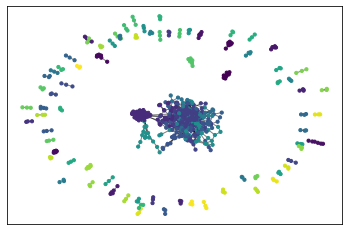

Cluster number of g: 93


In [88]:
drawgraph(g,partition6_1)
print("Cluster number of g:",1+max(partition6_1.values()))

In [68]:
df6=pd.DataFrame.from_dict(list(partition6.items()))
new_col = ['node', 'EgoNetSplitter_lable']
df6.columns = new_col
df6.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df6,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable
0,0,0.0,0,0,0,4,0,121,2,[0]
1,1,0.0,0,0,0,4,0,77,2,[0]
2,2,0.0,0,0,1,3,1,101,13,[1]
3,3,0.0,0,0,0,4,0,77,2,[0]
4,4,0.0,0,0,0,4,0,438,15,[0]
...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,[0]
767,767,1.0,1,1,35,6,12,228,610,[17]
768,768,1.0,1,1,20,6,25,174,715,[12]
769,769,1.0,1,1,86,6,93,149,751,[45]


## DANMF

In [69]:
from karateclub import DANMF
DANMF_g = DANMF()
DANMF_g.fit(g)
partition7 = DANMF_g.get_memberships()
partition7

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 6,
 19: 7,
 20: 7,
 21: 7,
 22: 7,
 23: 0,
 24: 7,
 25: 0,
 26: 0,
 27: 7,
 28: 7,
 29: 7,
 30: 7,
 31: 6,
 32: 7,
 33: 6,
 34: 0,
 35: 0,
 36: 7,
 37: 7,
 38: 7,
 39: 7,
 40: 0,
 41: 7,
 42: 0,
 43: 0,
 44: 5,
 45: 0,
 46: 7,
 47: 6,
 48: 7,
 49: 7,
 50: 7,
 51: 7,
 52: 7,
 53: 6,
 54: 7,
 55: 5,
 56: 6,
 57: 7,
 58: 6,
 59: 5,
 60: 0,
 61: 0,
 62: 0,
 63: 5,
 64: 0,
 65: 5,
 66: 0,
 67: 0,
 68: 7,
 69: 0,
 70: 6,
 71: 6,
 72: 0,
 73: 7,
 74: 7,
 75: 0,
 76: 6,
 77: 7,
 78: 4,
 79: 7,
 80: 7,
 81: 0,
 82: 7,
 83: 6,
 84: 7,
 85: 6,
 86: 7,
 87: 7,
 88: 4,
 89: 7,
 90: 6,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 7,
 96: 0,
 97: 7,
 98: 0,
 99: 7,
 100: 7,
 101: 7,
 102: 0,
 103: 0,
 104: 0,
 105: 7,
 106: 5,
 107: 0,
 108: 7,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 7,
 115: 7,
 116: 2,
 117: 7,
 118: 0,
 119: 7,
 120: 7,
 121: 0,
 122: 0,
 12

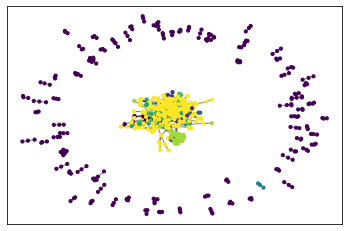

Cluster number of g: 8


In [71]:
drawgraph(g,partition7)
print("Cluster number of g:",1+max(partition7.values()))

In [72]:
df7=pd.DataFrame.from_dict(list(partition7.items()))
new_col = ['node', 'DANMF_lable']
df7.columns = new_col
df7.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df7,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable
0,0,0.0,0,0,0,4,0,121,2,[0],0
1,1,0.0,0,0,0,4,0,77,2,[0],0
2,2,0.0,0,0,1,3,1,101,13,[1],0
3,3,0.0,0,0,0,4,0,77,2,[0],0
4,4,0.0,0,0,0,4,0,438,15,[0],0
...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,[0],0
767,767,1.0,1,1,35,6,12,228,610,[17],7
768,768,1.0,1,1,20,6,25,174,715,[12],5
769,769,1.0,1,1,86,6,93,149,751,[45],7


## NNSED

In [73]:
from karateclub import NNSED
NNSED_g = NNSED()
NNSED_g.fit(g)
partition8 = NNSED_g.get_memberships()
partition8

{0: 2,
 1: 17,
 2: 10,
 3: 2,
 4: 2,
 5: 17,
 6: 17,
 7: 18,
 8: 18,
 9: 18,
 10: 21,
 11: 7,
 12: 26,
 13: 29,
 14: 30,
 15: 12,
 16: 19,
 17: 17,
 18: 31,
 19: 13,
 20: 18,
 21: 24,
 22: 17,
 23: 29,
 24: 13,
 25: 17,
 26: 29,
 27: 13,
 28: 13,
 29: 18,
 30: 16,
 31: 31,
 32: 11,
 33: 21,
 34: 2,
 35: 30,
 36: 9,
 37: 27,
 38: 8,
 39: 27,
 40: 24,
 41: 31,
 42: 2,
 43: 26,
 44: 24,
 45: 13,
 46: 13,
 47: 31,
 48: 31,
 49: 21,
 50: 13,
 51: 18,
 52: 13,
 53: 31,
 54: 18,
 55: 0,
 56: 31,
 57: 29,
 58: 31,
 59: 24,
 60: 7,
 61: 19,
 62: 22,
 63: 26,
 64: 7,
 65: 13,
 66: 2,
 67: 19,
 68: 29,
 69: 10,
 70: 31,
 71: 31,
 72: 7,
 73: 13,
 74: 29,
 75: 18,
 76: 31,
 77: 17,
 78: 13,
 79: 21,
 80: 18,
 81: 11,
 82: 18,
 83: 21,
 84: 13,
 85: 31,
 86: 13,
 87: 29,
 88: 17,
 89: 18,
 90: 31,
 91: 8,
 92: 10,
 93: 13,
 94: 9,
 95: 21,
 96: 22,
 97: 18,
 98: 18,
 99: 24,
 100: 4,
 101: 18,
 102: 3,
 103: 25,
 104: 22,
 105: 18,
 106: 2,
 107: 18,
 108: 4,
 109: 23,
 110: 23,
 111: 10,
 112: 17,

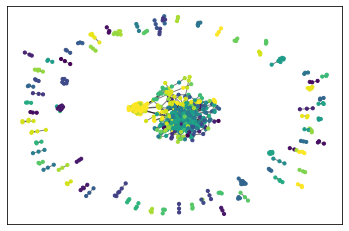

Cluster number of g: 32


In [75]:
drawgraph(g,partition8)
print("Cluster number of g:",1+max(partition8.values()))

In [76]:
df8=pd.DataFrame.from_dict(list(partition8.items()))
new_col = ['node', 'NNSED_lable']
df8.columns = new_col
df8.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df8,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable,NNSED_lable
0,0,0.0,0,0,0,4,0,121,2,[0],0,2
1,1,0.0,0,0,0,4,0,77,2,[0],0,17
2,2,0.0,0,0,1,3,1,101,13,[1],0,10
3,3,0.0,0,0,0,4,0,77,2,[0],0,2
4,4,0.0,0,0,0,4,0,438,15,[0],0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,[0],0,2
767,767,1.0,1,1,35,6,12,228,610,[17],7,17
768,768,1.0,1,1,20,6,25,174,715,[12],5,17
769,769,1.0,1,1,86,6,93,149,751,[45],7,11


## MNMF

In [77]:
from karateclub import MNMF
MNMF_g = MNMF()
MNMF_g.fit(g)
partition9 = MNMF_g.get_memberships()
partition9

{0: 1,
 1: 1,
 2: 5,
 3: 1,
 4: 1,
 5: 3,
 6: 3,
 7: 4,
 8: 4,
 9: 4,
 10: 1,
 11: 6,
 12: 3,
 13: 7,
 14: 7,
 15: 5,
 16: 5,
 17: 8,
 18: 1,
 19: 8,
 20: 1,
 21: 2,
 22: 9,
 23: 2,
 24: 7,
 25: 3,
 26: 4,
 27: 7,
 28: 4,
 29: 7,
 30: 1,
 31: 6,
 32: 2,
 33: 4,
 34: 1,
 35: 7,
 36: 2,
 37: 7,
 38: 8,
 39: 5,
 40: 0,
 41: 0,
 42: 1,
 43: 1,
 44: 9,
 45: 8,
 46: 3,
 47: 6,
 48: 7,
 49: 7,
 50: 5,
 51: 5,
 52: 7,
 53: 9,
 54: 0,
 55: 9,
 56: 6,
 57: 9,
 58: 4,
 59: 5,
 60: 5,
 61: 9,
 62: 5,
 63: 5,
 64: 8,
 65: 8,
 66: 1,
 67: 9,
 68: 2,
 69: 9,
 70: 3,
 71: 3,
 72: 5,
 73: 7,
 74: 2,
 75: 4,
 76: 4,
 77: 9,
 78: 2,
 79: 0,
 80: 7,
 81: 2,
 82: 7,
 83: 4,
 84: 4,
 85: 6,
 86: 4,
 87: 9,
 88: 0,
 89: 4,
 90: 6,
 91: 3,
 92: 9,
 93: 8,
 94: 9,
 95: 0,
 96: 5,
 97: 1,
 98: 6,
 99: 2,
 100: 0,
 101: 8,
 102: 6,
 103: 8,
 104: 7,
 105: 7,
 106: 9,
 107: 4,
 108: 0,
 109: 7,
 110: 6,
 111: 9,
 112: 5,
 113: 7,
 114: 2,
 115: 3,
 116: 1,
 117: 2,
 118: 0,
 119: 9,
 120: 4,
 121: 9,
 122: 0,
 12

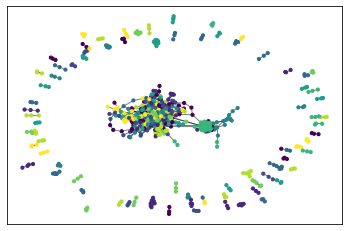

Cluster number of g: 10


In [78]:
drawgraph(g,partition9)
print("Cluster number of g:",1+max(partition9.values()))

In [79]:
df9=pd.DataFrame.from_dict(list(partition9.items()))
new_col = ['node', 'MNMF_lable']
df9.columns = new_col
df9.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df9,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable,NNSED_lable,MNMF_lable
0,0,0.0,0,0,0,4,0,121,2,[0],0,2,1
1,1,0.0,0,0,0,4,0,77,2,[0],0,17,1
2,2,0.0,0,0,1,3,1,101,13,[1],0,10,5
3,3,0.0,0,0,0,4,0,77,2,[0],0,2,1
4,4,0.0,0,0,0,4,0,438,15,[0],0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,[0],0,2,1
767,767,1.0,1,1,35,6,12,228,610,[17],7,17,9
768,768,1.0,1,1,20,6,25,174,715,[12],5,17,5
769,769,1.0,1,1,86,6,93,149,751,[45],7,11,2


## BigClam

In [80]:
from karateclub import BigClam
BigClam_g = BigClam()
BigClam_g.fit(g)
partition10 = BigClam_g.get_memberships()
partition10

{0: 0,
 1: 0,
 2: 0,
 3: 2,
 4: 0,
 5: 0,
 6: 2,
 7: 0,
 8: 2,
 9: 2,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 2,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 2,
 48: 2,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 2,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 2,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

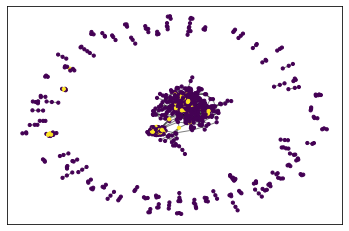

Cluster number of g: 3


In [81]:
drawgraph(g,partition10)
print("Cluster number of g:",1+max(partition10.values()))

In [82]:
df10=pd.DataFrame.from_dict(list(partition10.items()))
new_col = ['node', 'BigClam_lable']
df10.columns = new_col
df10.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df10,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable,NNSED_lable,MNMF_lable,BigClam_lable
0,0,0.0,0,0,0,4,0,121,2,[0],0,2,1,0
1,1,0.0,0,0,0,4,0,77,2,[0],0,17,1,0
2,2,0.0,0,0,1,3,1,101,13,[1],0,10,5,0
3,3,0.0,0,0,0,4,0,77,2,[0],0,2,1,2
4,4,0.0,0,0,0,4,0,438,15,[0],0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,[0],0,2,1,2
767,767,1.0,1,1,35,6,12,228,610,[17],7,17,9,0
768,768,1.0,1,1,20,6,25,174,715,[12],5,17,5,0
769,769,1.0,1,1,86,6,93,149,751,[45],7,11,2,0


## SymmNMF

In [83]:
from karateclub import SymmNMF
SymmNMF_g =SymmNMF()
SymmNMF_g.fit(g)
partition11 = SymmNMF_g.get_memberships()
partition11

{0: 21,
 1: 21,
 2: 21,
 3: 21,
 4: 21,
 5: 1,
 6: 8,
 7: 8,
 8: 8,
 9: 8,
 10: 21,
 11: 26,
 12: 12,
 13: 21,
 14: 21,
 15: 12,
 16: 8,
 17: 8,
 18: 16,
 19: 21,
 20: 21,
 21: 21,
 22: 21,
 23: 8,
 24: 21,
 25: 1,
 26: 21,
 27: 21,
 28: 21,
 29: 21,
 30: 21,
 31: 0,
 32: 21,
 33: 20,
 34: 21,
 35: 8,
 36: 21,
 37: 21,
 38: 21,
 39: 18,
 40: 21,
 41: 21,
 42: 8,
 43: 12,
 44: 21,
 45: 8,
 46: 21,
 47: 16,
 48: 21,
 49: 18,
 50: 21,
 51: 21,
 52: 17,
 53: 0,
 54: 21,
 55: 21,
 56: 31,
 57: 21,
 58: 20,
 59: 21,
 60: 8,
 61: 21,
 62: 21,
 63: 21,
 64: 26,
 65: 21,
 66: 8,
 67: 21,
 68: 21,
 69: 8,
 70: 20,
 71: 23,
 72: 21,
 73: 21,
 74: 21,
 75: 8,
 76: 0,
 77: 21,
 78: 21,
 79: 21,
 80: 21,
 81: 21,
 82: 21,
 83: 20,
 84: 17,
 85: 31,
 86: 21,
 87: 21,
 88: 21,
 89: 21,
 90: 0,
 91: 8,
 92: 6,
 93: 8,
 94: 8,
 95: 21,
 96: 13,
 97: 21,
 98: 26,
 99: 21,
 100: 21,
 101: 21,
 102: 8,
 103: 30,
 104: 1,
 105: 21,
 106: 21,
 107: 8,
 108: 21,
 109: 26,
 110: 8,
 111: 21,
 112: 21,
 113: 21

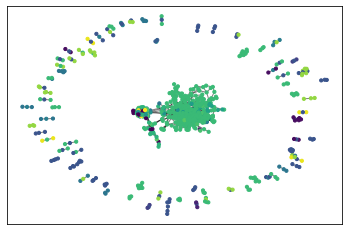

Cluster number of g: 32


In [84]:
drawgraph(g,partition11)
print("Cluster number of g:",1+max(partition11.values()))

In [100]:
df11=pd.DataFrame.from_dict(list(partition11.items()))
new_col = ['node', 'SymmNMF_lable']
df11.columns = new_col
df11.sort_values(by='node',inplace=True)
df_node = pd.merge(df_node,df11,on='node',how='outer')
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable,NNSED_lable,MNMF_lable,BigClam_lable,SymmNMF_lable_x,SymmNMF_lable_y
0,0,0.0,0,0,0,4,0,121,2,0,0,2,1,0,1,21
1,1,0.0,0,0,0,4,0,77,2,0,0,17,1,0,1,21
2,2,0.0,0,0,1,3,1,101,13,1,0,10,5,0,5,21
3,3,0.0,0,0,0,4,0,77,2,0,0,2,1,2,1,21
4,4,0.0,0,0,0,4,0,438,15,0,0,2,1,0,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,0,0,2,1,2,1,21
767,767,1.0,1,1,35,6,12,228,610,17,7,17,9,0,9,21
768,768,1.0,1,1,20,6,25,174,715,12,5,17,5,0,5,21
769,769,1.0,1,1,86,6,93,149,751,45,7,11,2,0,2,21


In [86]:
df_node['EgoNetSplitter_lable']=df_node['EgoNetSplitter_lable'].apply(lambda x:list(x)[0])
df_node

,node,lable,lable1,lable2,Louvain_lable,GEMSEC_lable,EdMot_lable,SCD_lable,LabelPropagation_lable,EgoNetSplitter_lable,DANMF_lable,NNSED_lable,MNMF_lable,BigClam_lable,SymmNMF_lable
0,0,0.0,0,0,0,4,0,121,2,0,0,2,1,0,1
1,1,0.0,0,0,0,4,0,77,2,0,0,17,1,0,1
2,2,0.0,0,0,1,3,1,101,13,1,0,10,5,0,5
3,3,0.0,0,0,0,4,0,77,2,0,0,2,1,2,1
4,4,0.0,0,0,0,4,0,438,15,0,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,766,0.0,0,0,0,4,0,77,2,0,0,2,1,2,1
767,767,1.0,1,1,35,6,12,228,610,17,7,17,9,0,9
768,768,1.0,1,1,20,6,25,174,715,12,5,17,5,0,5
769,769,1.0,1,1,86,6,93,149,751,45,7,11,2,0,2


# Evaluation 
## Modularity

In [91]:
import community
print("Louvain Modularity:",community.modularity(partition1,g))
print("GEMSEC Modularity:",community.modularity(partition2,g))
print("EdMot Modularity:",community.modularity(partition3,g))
print("SCD Modularity:",community.modularity(partition4,g))
print("LabelPropagation Modularity:",community.modularity(partition5,g))

print("EgoNetSplittern Modularity:",community.modularity(partition6_1,g))
print("DANMF Modularity:",community.modularity(partition7,g))
print("NNSED Modularity:",community.modularity(partition8,g))
print("MNMF Modularity:",community.modularity(partition9,g))
print("BigClam Modularity:",community.modularity(partition10,g))
print("SymmNMF:",community.modularity(partition11,g))

Louvain Modularity: 0.7301935268549402
GEMSEC Modularity: 0.38872638769286955
EdMot Modularity: 0.7332519690369619
SCD Modularity: 0.3843092391638031
LabelPropagation Modularity: 0.7052276790001402
EgoNetSplittern Modularity: 0.7313787666736453
DANMF Modularity: 0.6234519858818122
NNSED Modularity: 0.6277909121249858
MNMF Modularity: 0.6576977026459008
BigClam Modularity: 0.22800271249305346
SymmNMF: 0.31909581137861703


## Purity

In [101]:
from sklearn.metrics import accuracy_score
import numpy as np

def purity_score(y_true, y_pred):
    """Purity score
        Args:
            y_true(np.ndarray): n*1 matrix Ground truth labels
            y_pred(np.ndarray): n*1 matrix Predicted clusters

        Returns:
            float: Purity score
    """
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bins
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner

    return accuracy_score(y_true, y_voted_labels)

print("Louvain Purity:",purity_score(df_node.lable1.values,df_node.Louvain_lable.values))
print("GEMSEC Purity:",purity_score(df_node.lable1.values,df_node.GEMSEC_lable.values))
print("EdMot Purity:",purity_score(df_node.lable1.values,df_node.EdMot_lable.values))
print("SCD Purity:",purity_score(df_node.lable1.values,df_node.SCD_lable.values))
print("LabelPropagation Purity:",purity_score(df_node.lable1.values,df_node.LabelPropagation_lable.values))
print("EgoNetSplittern Modularity:",purity_score(df_node.lable1.values,df_node.EgoNetSplitter_lable.values))
print("DANMF Modularity:",purity_score(df_node.lable1.values,df_node.DANMF_lable.values))
print("NNSED Modularity:",purity_score(df_node.lable1.values,df_node.NNSED_lable.values))
print("MNMF Modularity:",purity_score(df_node.lable1.values,df_node.MNMF_lable.values))
print("BigClam Modularity:",purity_score(df_node.lable1.values,df_node.BigClam_lable.values))
print("SymmNMF:",purity_score(df_node.lable1.values,df_node.SymmNMF_lable_y.values))

Louvain Purity: 0.9922178988326849
GEMSEC Purity: 0.8871595330739299
EdMot Purity: 0.9922178988326849
SCD Purity: 0.9974059662775616
LabelPropagation Purity: 0.993514915693904
EgoNetSplittern Modularity: 0.9922178988326849
DANMF Modularity: 0.9753566796368353
NNSED Modularity: 0.8261997405966277
MNMF Modularity: 0.6653696498054474
BigClam Modularity: 0.642023346303502
SymmNMF: 0.8793774319066148


## NMI


In [103]:
import math
from sklearn import metrics
def NMI(A,B):
    # 样本点数
    total = len(A)
    A_ids = set(A)
    B_ids = set(B)
    # 互信息计算
    MI = 0
    eps = 1.4e-45
    for idA in A_ids:
        for idB in B_ids:
            idAOccur = np.where(A==idA)    # 输出满足条件的元素的下标
            idBOccur = np.where(B==idB)
            idABOccur = np.intersect1d(idAOccur,idBOccur)   # Find the intersection of two arrays.
            px = 1.0*len(idAOccur[0])/total
            py = 1.0*len(idBOccur[0])/total
            pxy = 1.0*len(idABOccur)/total
            MI = MI + pxy*math.log(pxy/(px*py)+eps,2)
    # 标准化互信息
    Hx = 0
    for idA in A_ids:
        idAOccurCount = 1.0*len(np.where(A==idA)[0])
        Hx = Hx - (idAOccurCount/total)*math.log(idAOccurCount/total+eps,2)
        Hy = 0
    for idB in B_ids:
        idBOccurCount = 1.0*len(np.where(B==idB)[0])
        Hy = Hy - (idBOccurCount/total)*math.log(idBOccurCount/total+eps,2)
    MIhat = 2.0*MI/(Hx+Hy)
    return MIhat
 
print("Louvain NMI:",NMI(df_node.lable1.values,df_node.Louvain_lable.values))
print("GEMSEC NMI:",NMI(df_node.lable1.values,df_node.GEMSEC_lable.values))
print("EdMot NMI:",NMI(df_node.lable1.values,df_node.EdMot_lable.values))
print("SCD NMI:",NMI(df_node.lable1.values,df_node.SCD_lable.values))
print("LabelPropagation NMI:",NMI(df_node.lable1.values,df_node.LabelPropagation_lable.values))


print("EgoNetSplitter Modularity:",NMI(df_node.lable1.values,df_node.EgoNetSplitter_lable.values))
print("DANMF Modularity:",NMI(df_node.lable1.values,df_node.DANMF_lable.values))
print("NNSED Modularity:",NMI(df_node.lable1.values,df_node.NNSED_lable.values))
print("MNMF Modularity:",NMI(df_node.lable1.values,df_node.MNMF_lable.values))
print("BigClam Modularity:",NMI(df_node.lable1.values,df_node.BigClam_lable.values))
print("SymmNMF:",NMI(df_node.lable1.values,df_node.SymmNMF_lable_y.values))

Louvain NMI: 0.3151683335170717
GEMSEC NMI: 0.3715649809469584
EdMot NMI: 0.2912024161586403
SCD NMI: 0.19975569194923468
LabelPropagation NMI: 0.2413169863340384
EgoNetSplitter Modularity: 0.2958926286726054
DANMF Modularity: 0.5410457937775245
NNSED Modularity: 0.1377406250391508
MNMF Modularity: 0.03252409279380027
BigClam Modularity: 0.03974940186065849
SymmNMF: 0.2847074826507582


## ARI (Adjusted Rand index)

In [104]:
print("Louvain ARI1:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.Louvain_lable.values))
print("GEMSEC ARI1:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.GEMSEC_lable.values))
print("EdMot ARI1:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.EdMot_lable.values))
print("SCD ARI1:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.SCD_lable.values))
print("LabelPropagation ARI1:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.LabelPropagation_lable.values))


print("EgoNetSplitter Modularity:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.EgoNetSplitter_lable.values))
print("DANMF Modularity:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.DANMF_lable.values))
print("NNSED Modularity:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.NNSED_lable.values))
print("MNMF Modularity:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.MNMF_lable.values))
print("BigClam Modularity:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.BigClam_lable.values))
print("SymmNMF:",metrics.adjusted_rand_score(df_node.lable1.values,df_node.SymmNMF_lable_y.values))

Louvain ARI1: 0.16166189967180555
GEMSEC ARI1: 0.47233629519346226
EdMot ARI1: 0.10232790568630633
SCD ARI1: 0.004428492147914174
LabelPropagation ARI1: 0.0400037714694768
EgoNetSplitter Modularity: 0.11436240297674964
DANMF Modularity: 0.48685720748174055
NNSED Modularity: 0.062290080352163914
MNMF Modularity: 0.018179939023714262
BigClam Modularity: -0.03889261991936624
SymmNMF: 0.1810303037237467
